<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>Bruce Zhang, Diana Cheng, Wendy Jiang</center>
</h1>

<h1>
<center>Project</center>
</h1>


#Introduction#
The motivation of training and predicting the gold price is because gold can be wealth protection. Gold is often considered a "safe haven" for investors during turbulent times. Silver, along with gold, is considered to be a safe haven investment. This means that silver is seen as retaining its value and purchasing power better than paper currency and certain other assets when there is economic uncertainty.

The data set are Gold Price, Silver Price from 1991.1.2 to 2020.12.30 and are
included here (https://drive.google.com/drive/folders/1NCv5wlbiJjQ5tpfC0gmVyHUzwQczunDZ?usp=sharing). Each instance is the adjusted price of gold or silver every trading day. There are total of 7584 of days used. We focus on daily return on gold price and use machine learning to develop four models to predict the training set (from 1970 to 2018). We will then use these models to predict daily return on gold price on the test set (from 2018 to 2020). It's a time series data and they the main features are just the dates and prices. These data are obtained from Kaggle.
Then we select the best two models to test the model on the silver price to see the performance. 

The Main process Include:
1. Combine the gold price and silver price in one dataset
  >Select the totally period of data we need.

  >Fill the missing value use the last value.

  >Calcualte the daily returns
  
  >Split the returns as X and y (1-step ahead).

2. Create a training and testing set
  >Take the first 80% of the observations as the training set and the last 20% as the test set.

3. Apply the standatd scaler on the training set and use mean and variance to transform the test set. 

4. Train models
>The models inlcude: Linear Regression(no petalty, Lasso, Ridge), Random Forest, SVR, Gradient Boosting.

5. Fine-tune the models
> Compare their RMSE, plot prediction and true value, choose the best parameters for models.

6. Compare and select the best model
7. Evaluate the performance of models on silver price
> Use Ensemble Solution to forecasts 2-step-ahead


##Contribution
Wendy Jiang mainly implemented Random Forest and worked on dataframing, split training testing dataset, normalize data, and fit models and do predictions in silver; Bruce Zhang mainly implemented SVR, worked on introdcution, method explanation, and conclusion; Diana Cheng mainly implemented Gradient boosting and worked on cleaning time series and creating time series .
##Dataset
The dataset is from https://www.kaggle.com/datasets/lbronchal/gold-and-silver-prices-dataset while the column names have been modified with slight changes. 

#Combine the gold price and silver price in one dataset#

In [ ]:
import numpy as np
import os
import pandas as pd

In [ ]:
data = pd.read_csv("gold_price.csv")
silver = pd.read_csv("silver_price.csv")
comb = pd.concat([data,silver], axis=1)


In [ ]:
comb

In [ ]:
assemble = comb[['gold_price','silver_price','date1']]
temp_X = assemble[5825:13409]
dataframe = pd.DataFrame(temp_X,columns=['date1', 'gold_price', 'silver_price'])

In [ ]:
temp_X

,gold_price,silver_price,date1
5825,390.80,4.164,1/2/91
5826,386.30,4.097,1/3/91
5827,387.40,4.210,1/4/91
5828,391.10,4.203,1/7/91
5829,389.70,4.250,1/8/91
...,...,...,...
13404,1839.00,25.315,1/15/21
13405,1833.05,25.780,1/18/21
13406,1834.70,26.150,1/19/21
13407,1856.60,26.305,1/20/21


In [ ]:
dataframe

,date1,gold_price,silver_price
5825,1/2/91,390.80,4.164
5826,1/3/91,386.30,4.097
5827,1/4/91,387.40,4.210
5828,1/7/91,391.10,4.203
5829,1/8/91,389.70,4.250
...,...,...,...
13404,1/15/21,1839.00,25.315
13405,1/18/21,1833.05,25.780
13406,1/19/21,1834.70,26.150
13407,1/20/21,1856.60,26.305


In [ ]:
dataframe["date1"] = dataframe["date1"].astype("datetime64")

In [ ]:
dataframe = dataframe.set_index("date1")

In [ ]:
dataframe

,gold_price,silver_price
date1,,
1991-01-02,390.80,4.164
1991-01-03,386.30,4.097
1991-01-04,387.40,4.210
1991-01-07,391.10,4.203
1991-01-08,389.70,4.250
...,...,...
2021-01-15,1839.00,25.315
2021-01-18,1833.05,25.780
2021-01-19,1834.70,26.150


Draw the plot of both gold and silver price to see their trend from 1970 to 2020.

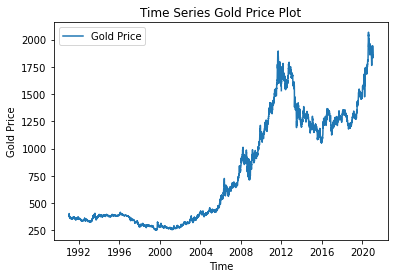

In [ ]:
import matplotlib.pyplot as plt

# Plot

plt.plot(dataframe['gold_price'])

# Labelling 

plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.title("Time Series Gold Price Plot")
plt.legend(["Gold Price"], loc=0)
# Display

plt.show()

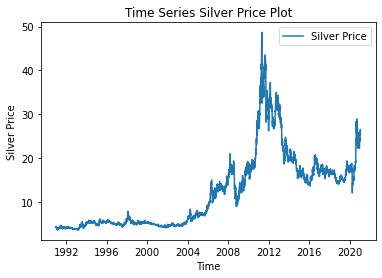

In [ ]:
plt.plot(dataframe['silver_price'])

# Labelling 

plt.xlabel("Time")
plt.ylabel("Silver Price")
plt.title("Time Series Silver Price Plot")
plt.legend(["Silver Price"], loc=0)
# Display

plt.show()

Here we can see silver price and gold price have similar trend.

#Cleaning the data, impute missing values#

In [ ]:
# Fill in missing values with their last known value
dataframe = dataframe.ffill()
dataframe.isnull().values.any()

False

In [ ]:
# Seperate the gold and silver price 
X_gold = dataframe[["gold_price"]]
X_silver = dataframe[["silver_price"]]

In [ ]:
X_gold

,gold_price
date1,
1991-01-02,390.80
1991-01-03,386.30
1991-01-04,387.40
1991-01-07,391.10
1991-01-08,389.70
...,...
2021-01-15,1839.00
2021-01-18,1833.05
2021-01-19,1834.70


In [ ]:
X_silver

,silver_price
date1,
1991-01-02,4.164
1991-01-03,4.097
1991-01-04,4.210
1991-01-07,4.203
1991-01-08,4.250
...,...
2021-01-15,25.315
2021-01-18,25.780
2021-01-19,26.150


In [ ]:
# Calculate daily return
X_gold['gold_price_t-1'] = X_gold['gold_price'].shift(1)
X_silver['silver_price_t-1'] = X_silver['silver_price'].shift(1)

In [ ]:
ret_gold = (X_gold['gold_price'] / X_gold['gold_price_t-1']) - 1
ret_silver = (X_silver['silver_price'] / X_silver['silver_price_t-1']) - 1

In [ ]:
ret_gold

date1
1991-01-02         NaN
1991-01-03   -0.011515
1991-01-04    0.002848
1991-01-07    0.009551
1991-01-08   -0.003580
                ...   
2021-01-15   -0.001493
2021-01-18   -0.003235
2021-01-19    0.000900
2021-01-20    0.011937
2021-01-21    0.002962
Length: 7584, dtype: float64

In [ ]:
ret_gold = ret_gold[1:]
ret_silver = ret_silver[1:]

#Create a training and testing set#

In [ ]:
# Create a supervised data out of the time series. The number of lagged values is 30.
# split X_gold data to X and y
from sklearn.model_selection import TimeSeriesSplit
def ts_split(ts, feature_steps=30, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps]
                  for idx in range(n_obs)])
    return X, y

X_new_gold, y_new_gold = ts_split(ret_gold, feature_steps=30, target_steps=1)
X_new_sil,y_new_sil = ts_split(ret_silver, feature_steps=30, target_steps=1)

In [ ]:
X_new_gold.shape

(7553, 30)

In [ ]:
# Take the first 80% of the observations as the training set 
# and the last 20% as the test set
split_ind = int(X_new_gold.shape[0]*0.8)
X_train_gold, y_train_gold = X_new_gold[:split_ind], y_new_gold[:split_ind]
X_test_gold, y_test_gold = X_new_gold[split_ind:], y_new_gold[split_ind:]

In [ ]:
y_train_gold=y_train_gold.flatten()
y_test_gold = y_test_gold.flatten()

In [ ]:
# apply the standard scaler to the train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_gold = scaler.fit_transform(X_train_gold)
X_test_gold = scaler.transform(X_test_gold)

In [ ]:
split_ind = int(X_new_gold.shape[0]*0.8)
X_train_sil, y_train_sil = X_new_sil[:split_ind], y_new_sil[:split_ind]
X_test_sil, y_test_sil = X_new_sil[split_ind:], y_new_sil[split_ind:]

y_train_sil = y_train_sil.flatten()
y_test_sil = y_test_sil.flatten()

In [ ]:
# apply the standard scaler to the train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sil = scaler.fit_transform(X_train_sil)

X_test_sil = scaler.transform(X_test_sil)

#Method#

## Linear Regression with no penalty

In [ ]:
#LinearRegression

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_gold, y_train_gold.ravel())

LinearRegression()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
series_len = X_train_gold.size
def validate_result(model, model_name):
    y_pred = model.predict(X_test_gold)
    # Evaluate the RMSE of the 1-step ahead forecast on the test set.
    RSME_score = np.sqrt(mean_squared_error(y_test_gold, y_pred))
    print('RMSE: ', RSME_score)
    fig, ax = plt.subplots(2,figsize=(10,10))
    ax[0].plot(range(series_len-y_test_gold.size,series_len), y_pred)
    ax[1].plot(range(series_len-y_test_gold.size,series_len), y_test_gold)
    ax[0].set_title("Prediction")
    ax[1].set_title("True value")
    plt.show()

RMSE:  0.009061383235509323


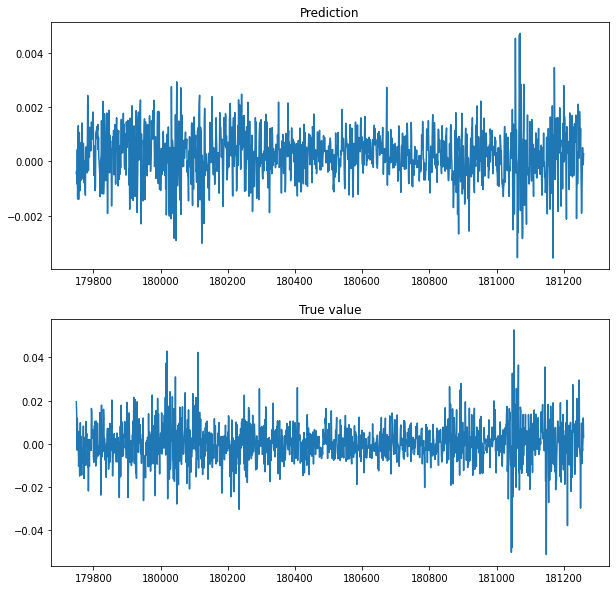

In [ ]:
#Linear regression
validate_result(lr_model, 'Linear Regression')

In [ ]:
from sklearn.model_selection import cross_val_score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train_gold,
                             y_train_gold,
                             cv=3,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

## Lasso (Linear Regression with l1 penalty)

As we use alpha $= [0.001, 0.01, 0.1, 1, 10, 100, 1000]$ and apply the GridSearchCV on the lasso model. We calculate the score (here use r2) and gives the best set of hyperparameters which gives the best score as an output. We use verbose=1,n_jobs=1.

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train_gold, y_train_gold)

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_gold, y_train_gold.ravel())
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.002300205163396063
Best Params:  {'alpha': 0.001}


In [ ]:
lasso_best = Lasso(alpha=0.001).fit(X_train_gold, y_train_gold)

RMSE:  0.008991430585310682


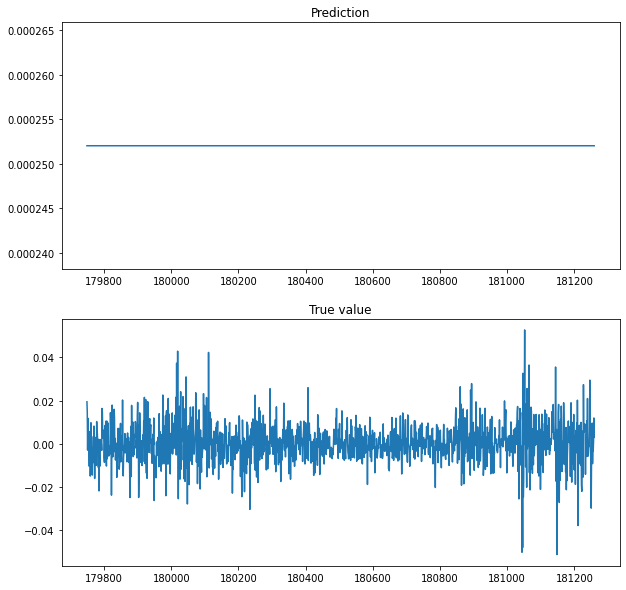

In [ ]:
validate_result(lasso_best, 'Lasso_best')

## Ridge (Linear Regression with l2 penalty)

As we use alpha $= [0.001, 0.01, 0.1, 1, 10, 100, 1000]$ and apply the GridSearchCV on the ridge model. We calculate the score (here use r2) and gives the best set of hyperparameters which gives the best score as an output. We use verbose=1,n_jobs=1.

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# Train model with default alpha=1


from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_gold, y_train_gold.ravel())
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.0041942724494203444
Best Params:  {'alpha': 1000}


In [ ]:
ridge_best = Ridge(alpha=1000).fit(X_train_gold, y_train_gold.ravel())

RMSE:  0.00904514756668871


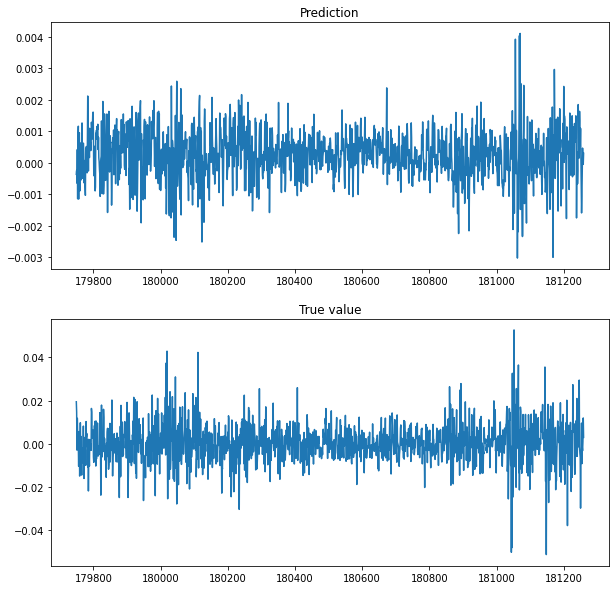

In [ ]:
validate_result(ridge_best, 'ridge_best')

## Random Forest

As we use n_estimators $= [5,20,50,100,200,500,750]$ and ccp_alpha$ = 1, 10^{-1}, 10^{-2}, 10^{-3}... 10^{-9}$, apply the RandomizedSearchCV on the random forest model. RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score (here use the mse) and gives the best set of hyperparameters which gives the best score as an output. We use cv$=3$, as it signifies 3 splits for cross validation.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [5,20,50,100,200,500,750] # number of trees in the random forest
ccp_alpha_list = [pow(10,-1*0),pow(10,-1*1),pow(10,-1*2),pow(10,-1*3),
                 pow(10,-1*4),pow(10,-1*5),pow(10,-1*6),pow(10,-1*7),
                 pow(10,-1*8),pow(10,-1*9)]

random_grid = {'n_estimators': n_estimators,
'ccp_alpha': ccp_alpha_list}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
                  cv = 3, scoring="neg_mean_squared_error", n_jobs = -1)

rf_random.fit(X_train_gold, y_train_gold.ravel())


print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 200, 500, 750], 'ccp_alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]} 

Best Parameters:  {'n_estimators': 100, 'ccp_alpha': 0.0001}  



In [ ]:
# use the best tuning parameter to get the best model 
# and fit the best model
randmf = RandomForestRegressor(n_estimators = 100, ccp_alpha= 0.0001) 
randmf.fit(X_train_gold, y_train_gold.ravel()) 

RandomForestRegressor(ccp_alpha=0.0001)

In [ ]:
# predict on the test set
# and calculate RMSE
from sklearn.metrics import mean_squared_error
y_pred_rf = randmf.predict(X_test_gold)
RSME_score = np.sqrt(mean_squared_error(y_test_gold, y_pred_rf))
print('RMSE: ', RSME_score)

RMSE:  0.008991515964118683


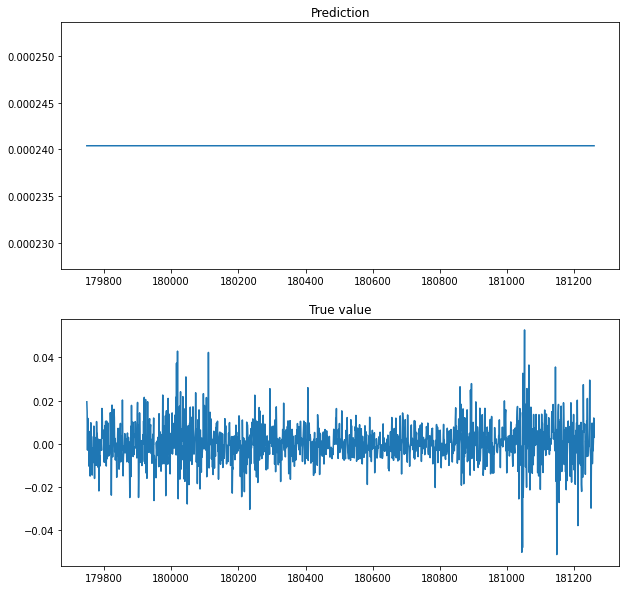

In [ ]:
# plot the prediction value and compare to the true value of returns
import matplotlib.pyplot as plt
series_len = X_train_gold.size
fig, ax = plt.subplots(2,figsize=(10,10))
ax[0].plot(range(series_len-y_test_gold.size,series_len), y_pred_rf)
ax[1].plot(range(series_len-y_test_gold.size,series_len), y_test_gold)
ax[0].set_title("Prediction")
ax[1].set_title("True value")
plt.show()

Here we can see the prediction line is a constant line. We can guess as out true value is similar to the white noise, out prediction of random forest model is optimized to be a constant value. 

##SVR

As we use kernel $= [linear, poly, rbf, sigmoid]$, C $ = [0.1,1,5,10,50]$, degree = $[3,8]$, coef0 = $[0.01,10,0.5]$,gamma = $ [auto, scale]$, and epsilon=$[0.1,0.2,0.3,0.5,0.7]$ to apply the GridSearchCV on the SVR model. It passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output. We use cv$=3$, as it signifies 3 splits for cross validation and n_jobs = -1, verbose=2.

In [ ]:
# Linear SVR
from sklearn.svm import SVR

In [ ]:
svr_lin = SVR()
#linear_svr_clf_feat = svr_lin.fit(X_train_gold,y_train_gold)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
RMSE:  0.013282591367119572


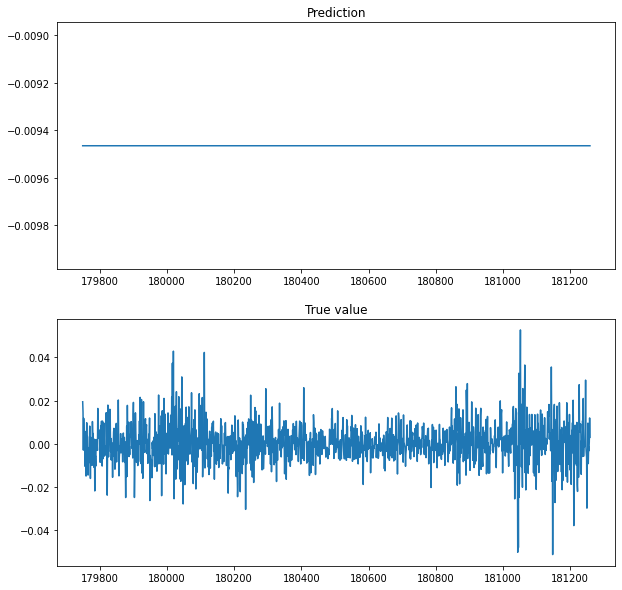

In [ ]:
from sklearn.model_selection import GridSearchCV
linear_svr_parameters = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C':[0.1,1,5,10,50],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale'),'epsilon':[0.1,0.2,0.3,0.5,0.7]},

lsvr_grid_search_feat = GridSearchCV(estimator=svr_lin,
                            param_grid=linear_svr_parameters,
                            cv=3,n_jobs = -1, verbose = 2)
grid_result = lsvr_grid_search_feat.fit(X_train_gold, y_train_gold.ravel())

validate_result(grid_result,'Linear SVR GS All Feat')


In [ ]:
grid_result.best_params_

{'C': 0.1,
 'coef0': 0.01,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'linear'}

Here we can see the prediction line is also a constant line. It's due to the fact it's the returns. We guess as the true value is similar to the white noise, out prediction of SVR model is optimized to be a constant value. The best estimator of white noise is the mean.

## Gradient boosting

As we use n_estimators $= [1, 2, 5, 10, 20, 50, 100, 200, 500]$ and max_leaf_nodes$ = [2, 5, 10, 20, 50, 100]$, apply the RandomizedSearchCV on the GradientBoostingRegressor model. RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score (here use the mse) and gives the best set of hyperparameters which gives the best score as an output. We use cv$=3$, as it signifies 3 splits for cross validation, random_state=0,n_jobs=2.

RMSE:  0.008991651227994977


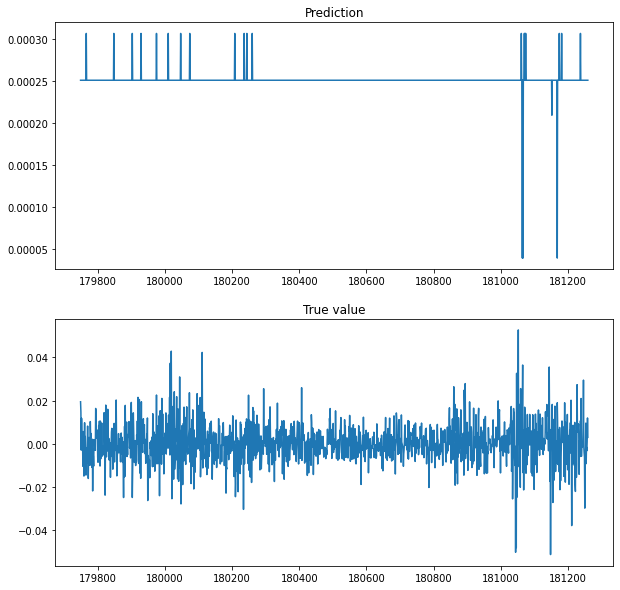

In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}
search_cv = RandomizedSearchCV(
    GradientBoostingRegressor(), param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2
)
search_cv.fit(X_train_gold, y_train_gold.ravel())
validate_result(search_cv,'gradient boosting')

In [ ]:
search_cv.best_params_

{'learning_rate': 0.014936835544198454,
 'max_leaf_nodes': 20,
 'n_estimators': 1}

The prediction is mostly a line with few peaks, corresponding to the characteristics of Gradient Boosting.

#Conclusion on Gold dataset#
As above results, the best three way to train and predict the gold price from 1991.1.2 to 2020.12.30 after tuning the model is
> linear regression

no penalty : RSME = 0.00905753;

l1 penalty(Lasso): RMSE = 0.00900416;

l2 penalty(Ridge): RMSE = 0.00905751.
> Random Forest

RMSE = 　0.008991515964118683

> SVR

RMSE = 0.013282591367119572

> Gradient Boosting

RSME = 0.008991651227994977

From above, we can conclude that the Random Forest model in Linear Regression get a little bit better performance than other models. 

#Train and Predict for silver price
> Compare Lasso and Random Forest on 1-step ahead of silver returns first. Then we got the best performance model. Use the best model to predict 2-step ahead of silver returns. 

## Lasso

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train_sil, y_train_sil)

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_gold, y_train_gold.ravel())
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.002300205163396063
Best Params:  {'alpha': 0.001}


In [ ]:
lasso_best = Lasso(alpha=0.001).fit(X_train_sil, y_train_sil)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
series_len = X_train_sil.size
def validate_result(model, model_name):
    y_pred = model.predict(X_test_gold)
    # Evaluate the RMSE of the 1-step ahead forecast on the test set.
    RSME_score = np.sqrt(mean_squared_error(y_test_gold, y_pred))
    print('RMSE: ', RSME_score)
    fig, ax = plt.subplots(2,figsize=(10,10))
    ax[0].plot(range(series_len-y_test_gold.size,series_len), y_pred)
    ax[1].plot(range(series_len-y_test_gold.size,series_len), y_test_gold)
    ax[0].set_title("Prediction")
    ax[1].set_title("True value")
    plt.show()

RMSE:  0.00902057227766644


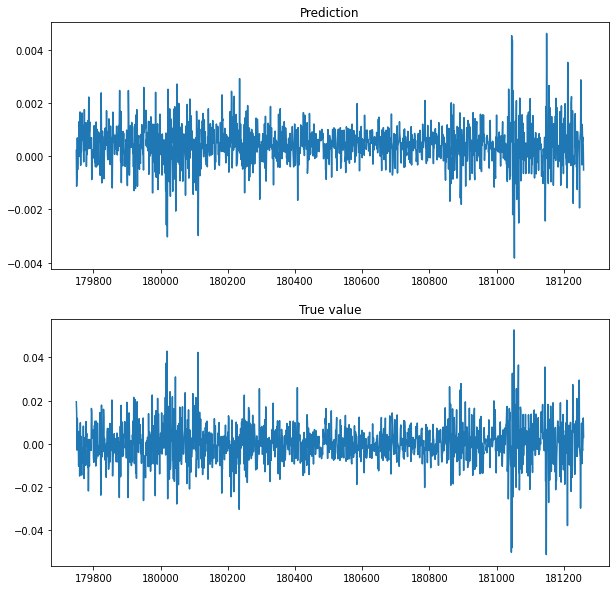

In [ ]:
validate_result(lasso_best, 'Lasso_best')

## Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [5,20,50,100,200,500,750] # number of trees in the random forest
ccp_alpha_list = [pow(10,-1*0),pow(10,-1*1),pow(10,-1*2),pow(10,-1*3),
                 pow(10,-1*4),pow(10,-1*5),pow(10,-1*6),pow(10,-1*7),
                 pow(10,-1*8),pow(10,-1*9)]

random_grid = {'n_estimators': n_estimators,
'ccp_alpha': ccp_alpha_list}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
                  cv = 3, scoring="neg_mean_squared_error", n_jobs = -1)

rf_random.fit(X_train_sil, y_train_sil.ravel())


print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 200, 500, 750], 'ccp_alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]} 

Best Parameters:  {'n_estimators': 5, 'ccp_alpha': 0.01}  



In [ ]:
# use the best tuning parameter to get the best model 
# and fit the best model
randmf = RandomForestRegressor(n_estimators = 5, ccp_alpha= 0.01) 
randmf.fit(X_train_sil, y_train_sil.ravel()) 

RandomForestRegressor(ccp_alpha=0.01, n_estimators=5)

In [ ]:
# predict on the test set
# and calculate RMSE
from sklearn.metrics import mean_squared_error
y_pred_rf = randmf.predict(X_test_sil)
RSME_score = np.sqrt(mean_squared_error(y_test_gold, y_pred_rf))
print('RMSE: ', RSME_score)

RMSE:  0.008991993785805383


## Apply Random Forest on 2-step ahead silver returns

For below prediction, we use random forest model for 2-step ahead. 

> Split time series for 2-step ahead

In [ ]:
X_new_2,y_new_2 = ts_split(ret_silver, feature_steps=30, target_steps=2)

In [ ]:
# Take the first 80% of the observations as the training set 
# and the last 20% as the test set
split_ind = int(X_new_2.shape[0]*0.8)
X_train_2, y_train_2 = X_new_2[:split_ind], y_new_2[:split_ind]
X_test_2, y_test_2 = X_new_2[split_ind:], y_new_2[split_ind:]

In [ ]:
# apply the standard scaler to the train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)

X_test_2 = scaler.transform(X_test_2)

In [ ]:
X_train_2.shape

(6041, 30)

In [ ]:
y_train_2.shape

(6041, 2)

> Apply Random Forest on 2-step ahead silver returns

In [ ]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
                  cv = 3, scoring="neg_mean_squared_error", n_jobs = -1)

rf_random.fit(X_train_2, y_train_2[:,1].ravel())

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [1, 0.1, 0.01, 0.001,
                                                      0.0001, 1e-05, 1e-06,
                                                      1e-07, 1e-08, 1e-09],
                                        'n_estimators': [5, 20, 50, 100, 200,
                                                         500, 750]},
                   scoring='neg_mean_squared_error')

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 200, 500, 750], 'ccp_alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]} 

Best Parameters:  {'n_estimators': 20, 'ccp_alpha': 0.001}  



In [ ]:
# use the best tuning parameter to get the best model 
# and fit the best model
randmf = RandomForestRegressor(n_estimators = 20, ccp_alpha= 0.001) 
randmf.fit(X_train_2, y_train_2[:,1].ravel()) 

RandomForestRegressor(ccp_alpha=0.001, n_estimators=20)

In [ ]:
# predict on the test set
# and calculate RMSE
from sklearn.metrics import mean_squared_error
y_pred2 = randmf.predict(X_test_2)
RSME_score = np.sqrt(mean_squared_error(y_test_gold, y_pred2))
print('RMSE: ', RSME_score)

RMSE:  0.008991412457140474


# Conclusion
> Lasso has RMSE 0.00902057227766644

> Random Forest has RMSE 0.008991993785805383.

As above, to compare the Lasso and Random forest, we find randomo forest get better performance, since it has smaller RSME. 

> The optimized 2-step ahead Random Forest model has RMSE 0.008991412457140474.

> The optimized 1-step ahead model has RMSE 0.008991993785805383. 

So we can conclude the 2-step ahead Random Forest model is the best.

#Citation#

sid321axn. (2021, July 20). Gold price prediction using machine learning. Kaggle. Retrieved June 6, 2022, from https://www.kaggle.com/code/sid321axn/gold-price-prediction-using-machine-learning 

Arjunprasadsarkhel. (2021, August 18). Simple random forest with hyperparameter tuning. Kaggle. Retrieved June 6, 2022, from https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning/notebook 